In [1]:
import pandas as pd


In [2]:
import plotly.graph_objects as go
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from datetime import datetime, timedelta
import pytz
    

In [3]:
# Load the datasets
apps_df = pd.read_csv('Play Store Data_1.csv')
reviews_df = pd.read_csv('User Reviews_1.csv')

In [4]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [6]:
#pd.read_csv() : csv files
#pd.read_excel() : excel files
#pd.read_sql() : SQL Databases
#pd.read_json() : JSON Files

In [8]:
#Data Cleaning
apps_df = apps_df.dropna(subset=['Rating'])
for column in apps_df.columns :
    apps_df[column].fillna(apps_df[column].mode()[0],inplace=True)
apps_df.drop_duplicates(inplace=True)
apps_df=apps_df=apps_df[apps_df['Rating']<=5]

C:\Users\El - Shaddai\AppData\Local\Temp\ipykernel_36784\3078397839.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df[column].fillna(apps_df[column].mode()[0],inplace=True)
C:\Users\El - Shaddai\AppData\Local\Temp\ipykernel_36784\3078397839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_df[column].fillna(apps_df[column].mod

In [9]:
# Converting 'Reviews' to int

apps_df['Reviews'] = apps_df['Reviews'].astype(int)

In [10]:
#Convert the Installs columns to numeric by removing commas and +
apps_df['Installs']=apps_df['Installs'].str.replace(',','').str.replace('+','').astype(int)

In [11]:
#Convert Price column to numeric after removing $
apps_df['Price']=apps_df['Price'].str.replace('$','').astype(float)

In [13]:
# Convert 'Last Updated' to datetime
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'])

In [14]:
# Create a new column 'Month' by extracting the month part of 'Last Updated'
apps_df['Month'] = apps_df['Last Updated'].dt.to_period('M')

In [16]:
# Filter data based on given conditions
filtered_data = apps_df[
    (apps_df['Content Rating'] == 'Teen') &
    (apps_df['App'].str.startswith('E')) &
    (apps_df['Installs'] > 10000)
]


In [17]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018-01
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018-01
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018-08
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018-06
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up,2017-06
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,2017-07
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,2018-07-06,1,4.1 and up,2018-07
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,2015-01


In [18]:
# Group by month and category to calculate the total installs
monthly_installs = filtered_data.groupby(['Month', 'Category']).agg({'Installs': 'sum'}).reset_index()

In [19]:
# Calculate month-over-month percentage change
monthly_installs['MoM_Change'] = monthly_installs.groupby('Category')['Installs'].pct_change() * 100

In [48]:
# Define the line chart with shaded areas for significant growth
fig = go.Figure()

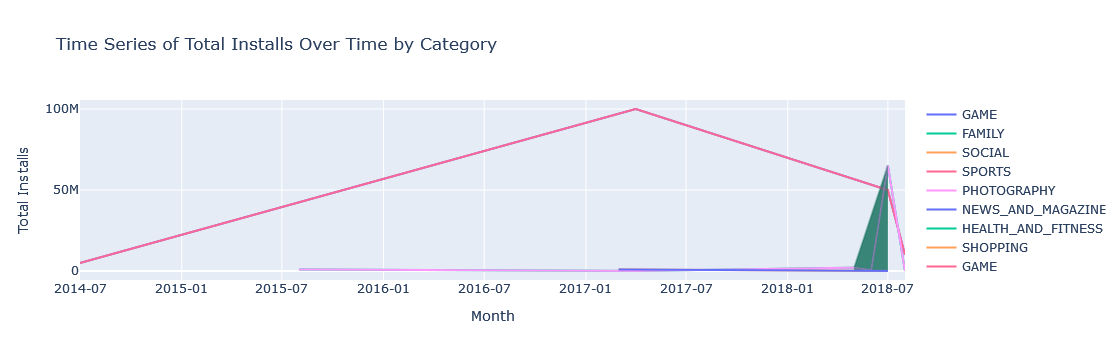

In [50]:
# Add traces for each category
for category in monthly_installs['Category'].unique():
    category_data = monthly_installs[monthly_installs['Category'] == category]
    fig.add_trace(go.Scatter(
        x=category_data['Month'].astype(str),
        y=category_data['Installs'],
        mode='lines',
        name=category
    ))
    # Highlight periods where MoM increase exceeds 20%
    significant_growth = category_data[category_data['MoM_Change'] > 20]
    fig.add_trace(go.Scatter(
        x=significant_growth['Month'].astype(str),
        y=significant_growth['Installs'],
        mode='lines',
        fill='tozeroy',
        line=dict(color='rgba(0,100,80,0.2)'),
        showlegend=False
    ))

fig.update_layout(
    title='Time Series of Total Installs Over Time by Category',
    xaxis_title='Month',
    yaxis_title='Total Installs',
    xaxis=dict(tickformat='%Y-%m'),
)



In [52]:
# Dash Application for the HTML Dashboard
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Play Store Installs Trend Analysis"),
    html.Div("Chart will display only between 4 PM and 8 PM Indian Standard Time (IST)."),
    dcc.Graph(id='timeseries-chart', figure=fig)
])

# Callback to check the time and only show graph between 4 PM to 8 PM IST
@app.callback(
    Output('timeseries-chart', 'figure'),
    [Input('timeseries-chart', 'id')]
)
def update_graph(input_value):
    # Get the current time in UTC and convert to Indian Standard Time (IST)
    current_time = datetime.now(pytz.timezone('UTC')).astimezone(pytz.timezone('Asia/Kolkata'))
    current_hour = current_time.hour
    
    # Check if current time is between 4 PM to 8 PM IST
    if 16 <= current_hour < 20:
        return fig
    else:
        # Return empty figure outside the time range
        return go.Figure()



In [53]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

In [54]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8060)